In [1]:
import tensorflow as tf

# Display the version
print(tf.__version__)	

# other imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

2.9.1


In [2]:
df_cd_temp = pd.read_csv('CIFAR_merged_newdiff.csv')
# df_cd_temp = pd.read_csv('cifar10_merged.csv')

# normal model

In [10]:
myacc = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        y_train = df_train['class']
        y_test = df_test_temp['class']
        x_train0 = df_train.drop(columns="class")
        x_test0 = df_test_temp.drop(columns="class")
        x_train0 = np.array(x_train0)
        x_test0 = np.array(x_test0)
        x_train0 = x_train0.reshape((x_train0.shape[0],3, 32, 32))
        x_train = np.empty([x_train0.shape[0], 32, 32, 3])
        for num in range(x_train0.shape[0]):
            x_train[num] = x_train0[num].T
            x_train[num] = np.rot90(x_train[num], k=3, axes=(0, 1))
        x_test0 = x_test0.reshape((x_test0.shape[0],3 , 32, 32))
        x_test = np.empty([x_test0.shape[0], 32, 32, 3])
        for num in range(x_test0.shape[0]):
            x_test[num] = x_test0[num].T
            x_test[num] = np.rot90(x_test[num], k=3, axes=(0, 1))
        # Reduce pixel values
        x_train, x_test = x_train / 255.0, x_test / 255.0
        # flatten the label values
        y_train, y_test = y_train.values.flatten(), y_test.values.flatten()
        from keras.models import load_model
        model = load_model('Cifar_norm_new'+ str(myround) + '.h5')
        myacc[myround-1,mydiff] = (model.evaluate(x_test,y_test)[1])


13/13 [==============================] - 1s 44ms/step - loss: 1.1301 - accuracy: 0.8123


13/13 [==============================] - 1s 49ms/step - loss: 2.0358 - accuracy: 0.6819


In [11]:
myacc

array([[0.86250001, 0.81592041, 0.83585858, 0.77897573, 0.64269143],
       [0.82075471, 0.81074768, 0.8292011 , 0.80253166, 0.72820514],
       [0.80815345, 0.81930691, 0.78163773, 0.76826197, 0.71503955],
       [0.79787236, 0.81884056, 0.84517765, 0.79205608, 0.71391755],
       [0.79611653, 0.82850242, 0.82296652, 0.80106103, 0.7282322 ],
       [0.83796299, 0.822335  , 0.81360203, 0.76804125, 0.74293059],
       [0.78756475, 0.82425743, 0.80051816, 0.78229666, 0.73152709],
       [0.82044888, 0.83770883, 0.79508197, 0.78756475, 0.69392526],
       [0.81662589, 0.78625953, 0.80253166, 0.77702701, 0.71388888],
       [0.83014351, 0.8308081 , 0.79527557, 0.75886524, 0.71204191],
       [0.79176754, 0.82009345, 0.79126215, 0.72533333, 0.68817204],
       [0.79418886, 0.82697201, 0.8059299 , 0.78728604, 0.73734939],
       [0.8034398 , 0.86863273, 0.79217607, 0.77941179, 0.72208434],
       [0.81170481, 0.7751323 , 0.78117645, 0.779661  , 0.71611255],
       [0.82188296, 0.80423278, 0.

In [12]:
nn = 0
meanPerBin = np.zeros(5)
for myturn in range (5):
    meanPerBin[myturn] = np.mean(myacc[:, myturn])
    nn += (np.mean(myacc[:, myturn]))
print(nn/5)
print(meanPerBin)

0.7861090505123138
[0.81568544 0.82140847 0.80552403 0.77806241 0.7098649 ]


In [13]:
myhist = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhist[myround-1,mydiff] = len(df_test_temp)
myhist

array([[400., 402., 396., 371., 431.],
       [424., 428., 363., 395., 390.],
       [417., 404., 403., 397., 379.],
       [376., 414., 394., 428., 388.],
       [412., 414., 418., 377., 379.],
       [432., 394., 397., 388., 389.],
       [386., 404., 386., 418., 406.],
       [401., 419., 366., 386., 428.],
       [409., 393., 395., 444., 360.],
       [418., 396., 381., 423., 382.],
       [413., 428., 412., 375., 372.],
       [413., 393., 371., 409., 415.],
       [407., 373., 409., 408., 403.],
       [393., 378., 425., 413., 391.],
       [393., 378., 403., 430., 396.],
       [420., 427., 369., 374., 410.],
       [398., 388., 399., 408., 410.],
       [408., 388., 415., 390., 399.],
       [371., 415., 389., 413., 412.],
       [361., 405., 412., 407., 415.]])

In [17]:
myhistAccum = np.zeros (5)
for histindex in range (5):
    myhistAccum[histindex] = np.sum(myhist[:, histindex])
print(myhistAccum)

[8052. 8041. 7903. 8054. 7955.]


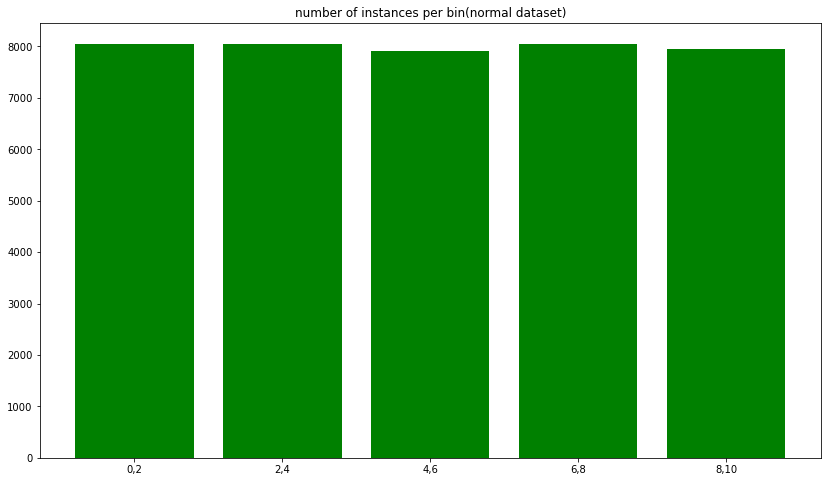

In [18]:
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccum, color='green')
plt.title("number of instances per bin(normal dataset)")
plt.show()

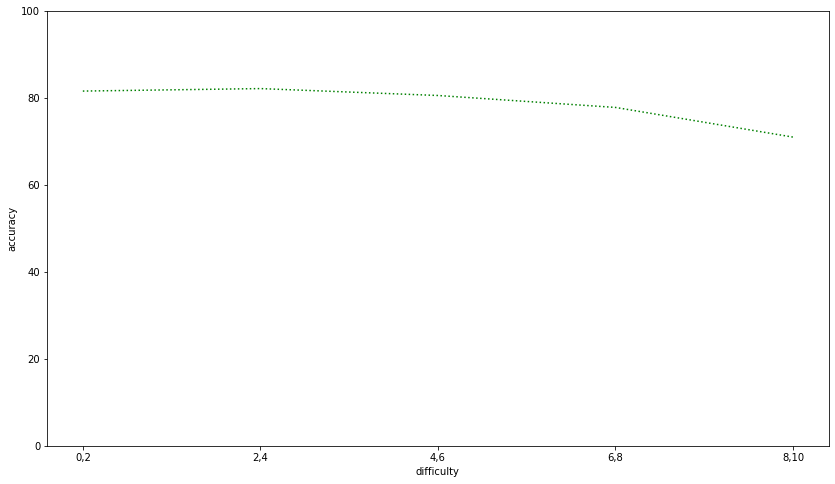

In [19]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
plt.rcParams['figure.figsize'] = [14, 8]
plt.ylim([0, 100])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.show()

In [15]:
#meanPerBin = [0.79911429, 0.8317701 , 0.8279106 , 0.81521758, 0.81394129,0.79659775, 0.78136204, 0.7744887 , 0.74064942, 0.67989944]
#meanPerBin = np.array(meanPerBin)

# contaminated model

In [20]:
myaccCont = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    #hardest=  hardest.drop(columns="Dffclt")
    hardest = hardest.iloc[:11000,:]
    shuffled_hardest = hardest.sample(frac=1, random_state=myround)
    contaminated_trianset = shuffled_hardest.iloc[:10000,:]
    hardest = shuffled_hardest.iloc[10000:11000,:]
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    df_test = df_cd1.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        y_train = df_train['class']
        y_test = df_test_temp['class']
        x_train0 = df_train.drop(columns="class")
        x_test0 = df_test_temp.drop(columns="class")
        x_train0 = np.array(x_train0)
        x_test0 = np.array(x_test0)
        x_train0 = x_train0.reshape((x_train0.shape[0],3, 32, 32))
        x_train = np.empty([x_train0.shape[0], 32, 32, 3])
        for num in range(x_train0.shape[0]):
            x_train[num] = x_train0[num].T
            x_train[num] = np.rot90(x_train[num], k=3, axes=(0, 1))
        x_test0 = x_test0.reshape((x_test0.shape[0],3 , 32, 32))
        x_test = np.empty([x_test0.shape[0], 32, 32, 3])
        for num in range(x_test0.shape[0]):
            x_test[num] = x_test0[num].T
            x_test[num] = np.rot90(x_test[num], k=3, axes=(0, 1))
        # Reduce pixel values
        x_train, x_test = x_train / 255.0, x_test / 255.0
        # flatten the label values
        y_train, y_test = y_train.values.flatten(), y_test.values.flatten()
        from keras.models import load_model
        model = load_model('Cifar_contam_new'+ str(myround) + '.h5')
        myaccCont[myround-1,mydiff] = (model.evaluate(x_test,y_test)[1])


22/22 [==============================] - 1s 45ms/step - loss: 1.1852 - accuracy: 0.8038


24/24 [==============================] - 2s 45ms/step - loss: 1.7492 - accuracy: 0.7202


In [21]:
myaccCont

array([[0.82564104, 0.83582091, 0.80402011, 0.78691018, 0.71962619],
       [0.82017541, 0.77927929, 0.82222223, 0.81018519, 0.6911357 ],
       [0.80090499, 0.8252427 , 0.81460673, 0.77510607, 0.73401165],
       [0.82738096, 0.87203789, 0.84313726, 0.78110945, 0.72266668],
       [0.79439253, 0.84331799, 0.8492462 , 0.79582715, 0.72246069],
       [0.78971964, 0.83084577, 0.796875  , 0.74891144, 0.72159094],
       [0.79365081, 0.81818181, 0.75129533, 0.7529586 , 0.72177422],
       [0.82038838, 0.81339711, 0.77653629, 0.75254732, 0.69541031],
       [0.79620856, 0.81420767, 0.76190478, 0.75944054, 0.69943023],
       [0.8680203 , 0.85714287, 0.82914573, 0.76028371, 0.73011363],
       [0.83769631, 0.80909091, 0.815534  , 0.7657935 , 0.7425068 ],
       [0.73515981, 0.84615386, 0.81382978, 0.78678679, 0.75546449],
       [0.83009708, 0.85792351, 0.87330317, 0.81426448, 0.71129709],
       [0.828125  , 0.81111109, 0.78026909, 0.78361672, 0.71240103],
       [0.78191489, 0.81460673, 0.

In [22]:
nnCont = 0
meanPerBinCont = np.zeros(5)
for myturn in range (5):
    meanPerBinCont[myturn] = np.mean(myaccCont[:, myturn])
    nnCont += (np.mean(myaccCont[:, myturn]))
print(nnCont/5)
print(meanPerBinCont)

0.7876022374629974
[0.80767933 0.82463289 0.80939752 0.77914783 0.71715362]


In [23]:
myhistCont = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    #hardest=  hardest.drop(columns="Dffclt")
    hardest = hardest.iloc[:11000,:]
    shuffled_hardest = hardest.sample(frac=1, random_state=myround)
    contaminated_trianset = shuffled_hardest.iloc[:10000,:]
    hardest = shuffled_hardest.iloc[10000:11000,:]
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    df_test = df_cd1.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhistCont[myround-1,mydiff] = len(df_test_temp)
myhistCont

array([[195., 201., 199., 657., 749.],
       [228., 222., 180., 648., 722.],
       [221., 206., 178., 707., 688.],
       [168., 211., 204., 667., 750.],
       [214., 217., 199., 671., 699.],
       [214., 201., 192., 689., 704.],
       [189., 198., 193., 676., 744.],
       [206., 209., 179., 687., 719.],
       [211., 183., 189., 715., 702.],
       [197., 196., 199., 705., 704.],
       [191., 220., 206., 649., 734.],
       [219., 195., 188., 666., 732.],
       [206., 183., 221., 673., 717.],
       [192., 180., 223., 647., 758.],
       [188., 178., 207., 693., 734.],
       [205., 223., 196., 650., 726.],
       [204., 196., 209., 667., 726.],
       [192., 199., 207., 651., 751.],
       [201., 197., 176., 693., 733.],
       [175., 207., 200., 671., 747.]])

In [24]:
myhistAccumCont = np.zeros (5)
for histindex in range (5):
    myhistAccumCont[histindex] = np.sum(myhistCont[:, histindex])
print(myhistAccumCont)

[ 4016.  4022.  3945. 13482. 14539.]


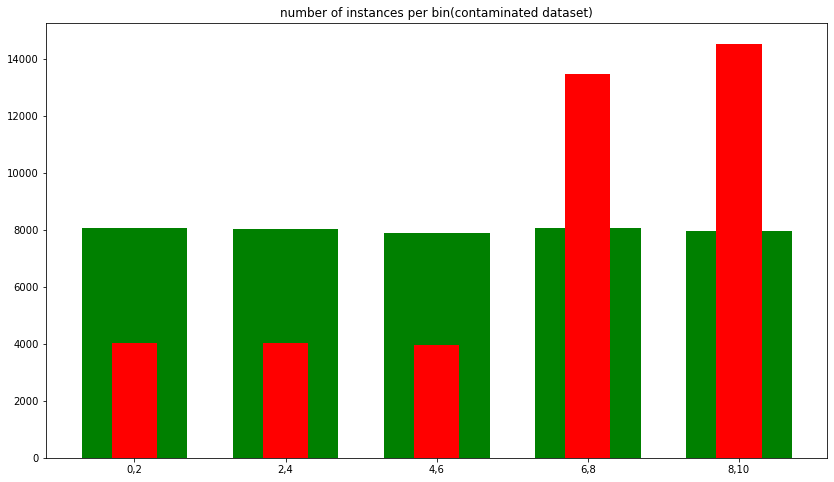

In [25]:
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccum,width=0.7, color='green')
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumCont,width=0.3, color = 'red')

plt.title("number of instances per bin(contaminated dataset)")
plt.show()

In [ ]:
# meanPerBinNew = [0.71428572, 0.72000001, 0.60714287, 0.62500002, 0.8309091 ,
#        0.82231537, 0.81719316, 0.78188153, 0.76519568, 0.71659919,
#        0.69835466, 0.6452514 ]
# type(meanPerBinContNew)
# meanPerBinNew = np.array(meanPerBinNew)

In [29]:
# meanPerBinContNew = np.zeros (5)
# meanPerBinContNew = [0.80118111, 0.8146718,  0.85048545, 0.82841328, 0.84199584, 0.79749479, 0.8180602,  0.78814017, 0.76028922, 0.70718231]
# meanPerBinContNew = np.array(meanPerBinContNew)


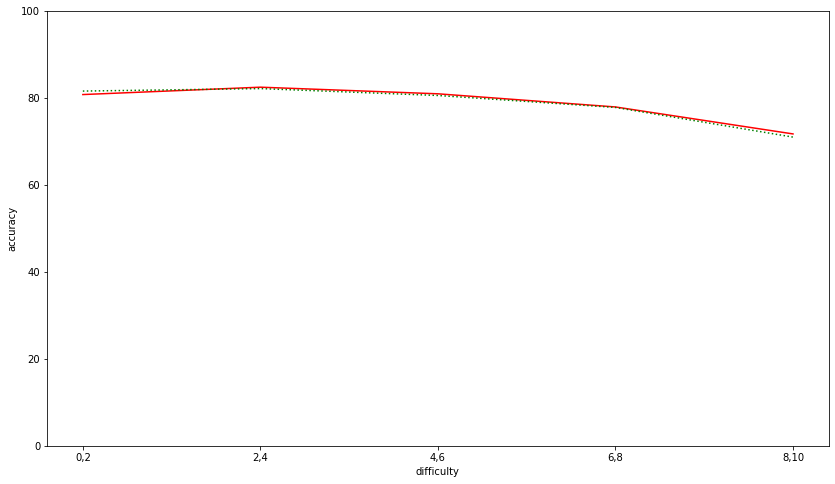

In [26]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
plt.rcParams['figure.figsize'] = [14, 8]
plt.ylim([0, 100])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.show()

In [151]:
# acc_new_cont = myaccCont*myhistCont

In [153]:
# acc_new_12Cont = np.zeros (12)
# for histindex in range (12):
#     acc_new_12Cont[histindex] = np.sum(acc_new_cont[:, histindex])
# print(acc_new_12Cont)
# print(acc_new_12Cont/myhistAccumCont)
# meanPerBinContNew = acc_new_12Cont/myhistAccumCont
# print(np.mean(acc_new_12Cont/myhistAccumCont))

[  15.00000012    9.00000012    5.00000006   16.99999997  238.9999994
 1313.9999795   781.99999857 1516.0000177  1691.00000036 1027.99998724
  679.9999935   433.00000691]
[0.75000001 0.75000001 0.50000001 0.5862069  0.84154929 0.83694266
 0.83103082 0.79957807 0.77073838 0.73011363 0.68895643 0.66718029]
0.7293580398532926


# Contaminate model on normal data

In [27]:
myaccCont_nor = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        y_train = df_train['class']
        y_test = df_test_temp['class']
        x_train0 = df_train.drop(columns="class")
        x_test0 = df_test_temp.drop(columns="class")
        x_train0 = np.array(x_train0)
        x_test0 = np.array(x_test0)
        x_train0 = x_train0.reshape((x_train0.shape[0],3, 32, 32))
        x_train = np.empty([x_train0.shape[0], 32, 32, 3])
        for num in range(x_train0.shape[0]):
            x_train[num] = x_train0[num].T
            x_train[num] = np.rot90(x_train[num], k=3, axes=(0, 1))
        x_test0 = x_test0.reshape((x_test0.shape[0],3 , 32, 32))
        x_test = np.empty([x_test0.shape[0], 32, 32, 3])
        for num in range(x_test0.shape[0]):
            x_test[num] = x_test0[num].T
            x_test[num] = np.rot90(x_test[num], k=3, axes=(0, 1))
        # Reduce pixel values
        x_train, x_test = x_train / 255.0, x_test / 255.0
        # flatten the label values
        y_train, y_test = y_train.values.flatten(), y_test.values.flatten()
        from keras.models import load_model
        model = load_model('Cifar_contam_new'+ str(myround) + '.h5')
        myaccCont_nor[myround-1,mydiff] = (model.evaluate(x_test,y_test)[1])


13/13 [==============================] - 1s 29ms/step - loss: 0.8523 - accuracy: 0.8329


13/13 [==============================] - 1s 47ms/step - loss: 2.0050 - accuracy: 0.7036


In [28]:
nnCont_nor = 0
meanPerBinCont_nor = np.zeros(5)
for myturn in range (5):

    meanPerBinCont_nor[myturn] = np.mean(myaccCont_nor[:, myturn])
    nnCont_nor += (np.mean(myaccCont_nor[:, myturn]))
print(nnCont_nor/5)
print(meanPerBinCont_nor)

0.7862856549024583
[0.81199346 0.8217077  0.80910676 0.77614851 0.71247184]


In [29]:
myhistCont_nor = np.zeros((5,10))

for myroundCont_nor in range(1,6):
    df_cd = df_cd_temp.sample(frac=1, random_state=myroundCont_nor)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhistCont_nor[myroundCont_nor-1,mydiff] = len(df_test_temp)
myhistCont_nor

array([[400., 402., 396., 371., 431.,   0.,   0.,   0.,   0.,   0.],
       [424., 428., 363., 395., 390.,   0.,   0.,   0.,   0.,   0.],
       [417., 404., 403., 397., 379.,   0.,   0.,   0.,   0.,   0.],
       [376., 414., 394., 428., 388.,   0.,   0.,   0.,   0.,   0.],
       [412., 414., 418., 377., 379.,   0.,   0.,   0.,   0.,   0.]])

In [30]:
myhistAccumCont_nor = np.zeros (5)
for histindex in range (5):
    myhistAccumCont_nor[histindex] = np.sum(myhistCont_nor[:, histindex])
print(myhistAccumCont_nor)

[2029. 2062. 1974. 1968. 1967.]


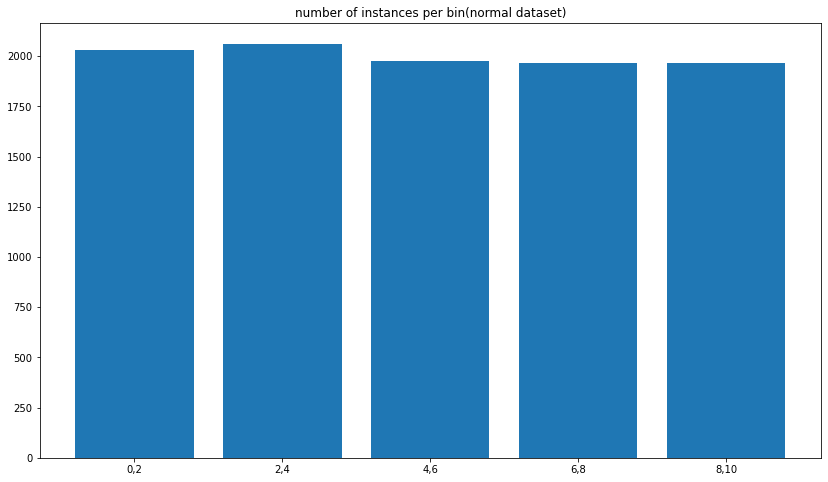

In [31]:
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumCont_nor)
plt.title("number of instances per bin(normal dataset)")
plt.show()

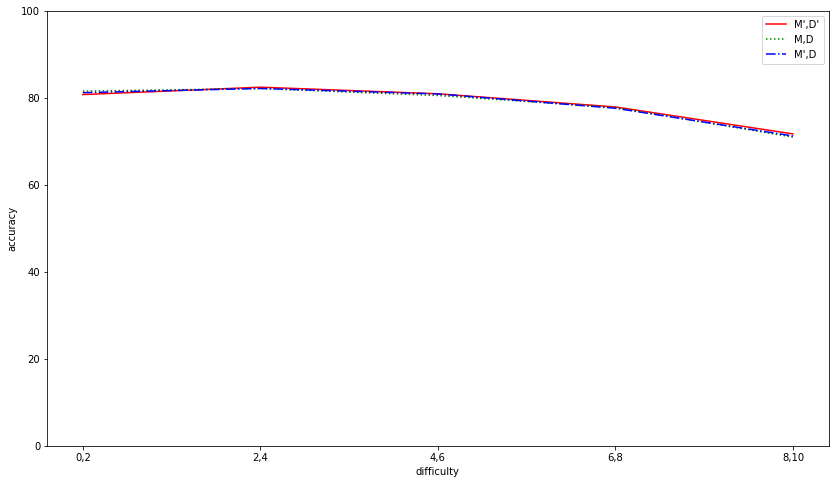

In [32]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
plt.ylim([0, 100])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.legend(["M',D'","M,D", "M',D"])
plt.show()

# Balanced dataset

In [ ]:
myaccBal = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    hardestbalanced = hardest[:1]
    for item_class in range (10):
        hardestTemp = hardest[hardest['class']==item_class]
        hardestbalanced = hardestbalanced.append(hardestTemp.iloc[:1100,:], ignore_index=True)

    hardestbalanced = hardestbalanced.iloc[1:,:]
    hardestbalanced = hardestbalanced.sample(frac=1, random_state=myround)
    #hardestbalanced=  hardestbalanced.drop(columns="Dffclt")
    contaminated_trianset = hardestbalanced.iloc[1000:11000,:]
    hardest = hardestbalanced.iloc[:1000,:]
    df_cd1=  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    df_test = df_cd1.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        y_train = df_train['class']
        y_test = df_test_temp['class']
        x_train0 = df_train.drop(columns="class")
        x_test0 = df_test_temp.drop(columns="class")
        x_train0 = np.array(x_train0)
        x_test0 = np.array(x_test0)
        x_train0 = x_train0.reshape((x_train0.shape[0],3, 32, 32))
        x_train = np.empty([x_train0.shape[0], 32, 32, 3])
        for num in range(x_train0.shape[0]):
            x_train[num] = x_train0[num].T
            x_train[num] = np.rot90(x_train[num], k=3, axes=(0, 1))
        x_test0 = x_test0.reshape((x_test0.shape[0],3 , 32, 32))
        x_test = np.empty([x_test0.shape[0], 32, 32, 3])
        for num in range(x_test0.shape[0]):
            x_test[num] = x_test0[num].T
            x_test[num] = np.rot90(x_test[num], k=3, axes=(0, 1))
        # Reduce pixel values
        x_train, x_test = x_train / 255.0, x_test / 255.0
        # flatten the label values
        y_train, y_test = y_train.values.flatten(), y_test.values.flatten()
        from keras.models import load_model
        model = load_model('Cifar_bal_new'+ str(myround) + '.h5')
        myaccBal[myround-1,mydiff] = (model.evaluate(x_test,y_test)[1])


In [ ]:
nnBal = 0
meanPerBinBal = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccBal[:, myturn])))
    meanPerBinBal[myturn] = np.mean(myaccBal[:, myturn])
    nnBal += (np.mean(myaccBal[:, myturn]))
nnBal/5

In [ ]:
myhistBal = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    hardestbalanced = hardest[:1]
    for item_class in range (10):
        hardestTemp = hardest[hardest['class']==item_class]
        hardestbalanced = hardestbalanced.append(hardestTemp.iloc[:1100,:], ignore_index=True)

    hardestbalanced = hardestbalanced.iloc[1:,:]
    hardestbalanced = hardestbalanced.sample(frac=1, random_state=myround)
    #hardestbalanced=  hardestbalanced.drop(columns="Dffclt")
    contaminated_trianset = hardestbalanced.iloc[1000:11000,:]
    hardest = hardestbalanced.iloc[:1000,:]
    df_cd1=  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    df_test = df_cd1.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhistBal[myround-1,mydiff] = len(df_test_temp)
myhistBal

In [ ]:
myhistAccumBal = np.zeros (5)
for histindex in range (5):
    myhistAccumBal[histindex] = np.sum(myhistBal[:, histindex])
print(myhistAccumBal)

In [ ]:
plt.xlabel("difficulty")
plt.ylabel("number of instances")
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumBal,width=0.8, color='black')
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccum,width=0.5, color='green')
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumCont,width=0.2, color = 'red')
plt.title("number of instances per bin(green=normal dataset, red=contaminated and black=balanced)")
plt.legend(["D''","D", "D'"])
plt.show()

In [ ]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
plt.ylim([0, 100])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.legend(["M',D'","M,D", "M',D","M'',D''"])
plt.show()

# M'' on D

In [40]:
myaccBal_nor = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        y_train = df_train['class']
        y_test = df_test_temp['class']
        x_train0 = df_train.drop(columns="class")
        x_test0 = df_test_temp.drop(columns="class")
        x_train0 = np.array(x_train0)
        x_test0 = np.array(x_test0)
        x_train0 = x_train0.reshape((x_train0.shape[0],3, 32, 32))
        x_train = np.empty([x_train0.shape[0], 32, 32, 3])
        for num in range(x_train0.shape[0]):
            x_train[num] = x_train0[num].T
            x_train[num] = np.rot90(x_train[num], k=3, axes=(0, 1))
        x_test0 = x_test0.reshape((x_test0.shape[0],3 , 32, 32))
        x_test = np.empty([x_test0.shape[0], 32, 32, 3])
        for num in range(x_test0.shape[0]):
            x_test[num] = x_test0[num].T
            x_test[num] = np.rot90(x_test[num], k=3, axes=(0, 1))
        # Reduce pixel values
        x_train, x_test = x_train / 255.0, x_test / 255.0
        # flatten the label values
        y_train, y_test = y_train.values.flatten(), y_test.values.flatten()
        from keras.models import load_model
        model = load_model('Cifar_bal_new'+ str(myround) + '.h5')
        myaccBal_nor[myround-1,mydiff] = (model.evaluate(x_test,y_test)[1])


13/13 [==============================] - 1s 46ms/step - loss: 1.2226 - accuracy: 0.8046


13/13 [==============================] - 1s 49ms/step - loss: 1.9336 - accuracy: 0.7181


In [42]:
nnBal_nor = 0
meanPerBinBal_nor = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccBal_nor[:, myturn])))
    meanPerBinBal_nor[myturn] = np.mean(myaccBal_nor[:, myturn])
    nnBal_nor += (np.mean(myaccBal_nor[:, myturn]))
print(nnBal_nor/5)
meanPerBinBal_nor

0.8123631715774536
0.8206521481275558
0.8057992130517959
0.7842684864997864
0.7154393792152405
0.7877044796943664


array([0.81236317, 0.82065215, 0.80579921, 0.78426849, 0.71543938])

In [ ]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
plt.ylim([0, 100])
#plt.figure(figsize=(20,10))
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal_nor*100, ls=':', color = 'orange')

plt.legend(["M',D'","M,D", "M',D","M'',D''","M'',D"])
plt.show()

In [ ]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal_nor*100, ls=':', color = 'orange')

plt.legend(["M',D'","M,D", "M',D","M'',D''","M'',D"])
plt.show()

# EasyOut 


In [46]:
myaccEasyOut = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    #hardest=  hardest.drop(columns="Dffclt")
    hardest = hardest.iloc[:11000,:]
    shuffled_hardest = hardest.sample(frac=1, random_state=myround)
    contaminated_trianset = shuffled_hardest.iloc[:10000,:]
    hardest = shuffled_hardest.iloc[10000:11000,:]
    df_easyout = df_cd .iloc[:22000,:]
    df_easyout = df_easyout.sort_values('Dffclt', ascending=True)
    df_easyout = df_easyout.iloc[6000:,:]
    df_easyout = df_easyout.sample(frac=1, random_state=myround)
    df_cd1 =  df_easyout#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_test = df_cd1.iloc[10000:11000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (1,5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        y_train = df_train['class']
        y_test = df_test_temp['class']
        x_train0 = df_train.drop(columns="class")
        x_test0 = df_test_temp.drop(columns="class")
        x_train0 = np.array(x_train0)
        x_test0 = np.array(x_test0)
        x_train0 = x_train0.reshape((x_train0.shape[0],3, 32, 32))
        x_train = np.empty([x_train0.shape[0], 32, 32, 3])
        for num in range(x_train0.shape[0]):
            x_train[num] = x_train0[num].T
            x_train[num] = np.rot90(x_train[num], k=3, axes=(0, 1))
        x_test0 = x_test0.reshape((x_test0.shape[0],3 , 32, 32))
        x_test = np.empty([x_test0.shape[0], 32, 32, 3])
        for num in range(x_test0.shape[0]):
            x_test[num] = x_test0[num].T
            x_test[num] = np.rot90(x_test[num], k=3, axes=(0, 1))
        # Reduce pixel values
        x_train, x_test = x_train / 255.0, x_test / 255.0
        # flatten the label values
        y_train, y_test = y_train.values.flatten(), y_test.values.flatten()
        from keras.models import load_model
        model = load_model('easyOut'+ str(myround) + '.h5')
        myaccEasyOut[myround-1,mydiff] = (model.evaluate(x_test,y_test)[1])


26/26 [==============================] - 1s 28ms/step - loss: 1.6433 - accuracy: 0.7430


In [47]:
myaccEasyOut = myaccCont

In [55]:
nnEasyout = 0
meanPerBinEasyout = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccEasyOut[:, myturn])))
    meanPerBinEasyout[myturn] = np.mean(myaccEasyOut[:, myturn])
    nnEasyout += (np.mean(myaccEasyOut[:, myturn]))
nnEasyout/5

0.8076793253421783
0.8246328890323639
0.8093975156545639
0.7791478335857391
0.7171536237001419


0.7876022374629974

In [49]:
meanPerBinEasyout

array([0.80767933, 0.82463289, 0.80939752, 0.77914783, 0.71715362])

# Easyout on Normal

In [50]:
myaccEasy_nor = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[22000:24000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        y_train = df_train['class']
        y_test = df_test_temp['class']
        x_train0 = df_train.drop(columns="class")
        x_test0 = df_test_temp.drop(columns="class")
        x_train0 = np.array(x_train0)
        x_test0 = np.array(x_test0)
        x_train0 = x_train0.reshape((x_train0.shape[0],3, 32, 32))
        x_train = np.empty([x_train0.shape[0], 32, 32, 3])
        for num in range(x_train0.shape[0]):
            x_train[num] = x_train0[num].T
            x_train[num] = np.rot90(x_train[num], k=3, axes=(0, 1))
        x_test0 = x_test0.reshape((x_test0.shape[0],3 , 32, 32))
        x_test = np.empty([x_test0.shape[0], 32, 32, 3])
        for num in range(x_test0.shape[0]):
            x_test[num] = x_test0[num].T
            x_test[num] = np.rot90(x_test[num], k=3, axes=(0, 1))
        # Reduce pixel values
        x_train, x_test = x_train / 255.0, x_test / 255.0
        # flatten the label values
        y_train, y_test = y_train.values.flatten(), y_test.values.flatten()
        from keras.models import load_model
        model = load_model('easyOut'+ str(myround) + '.h5')
        myaccEasy_nor[myround-1,mydiff] = (model.evaluate(x_test,y_test)[1])


14/14 [==============================] - 1s 30ms/step - loss: 1.0809 - accuracy: 0.8298


13/13 [==============================] - 1s 31ms/step - loss: 1.5204 - accuracy: 0.7524


In [51]:
nnEasy_nor = 0
meanPerBinEasy_nor = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccEasy_nor[:, myturn])))
    
    meanPerBinEasy_nor[myturn] = np.mean(myaccEasy_nor[:, myturn])
    nnEasy_nor += (np.mean(myaccEasy_nor[:, myturn]))
print(nnEasy_nor/5)
meanPerBinEasy_nor

0.8056181252002717
0.8247075825929642
0.8003851503133774
0.7839597344398499
0.7226505696773529
0.7874642324447633


array([0.80561813, 0.82470758, 0.80038515, 0.78395973, 0.72265057])

# retrieve Data

In [18]:
meanPerBin = np.array([0.79911429, 0.8317701 , 0.8279106 , 0.81521758, 0.81394129,0.79659775, 0.78136204, 0.7744887 , 0.74064942, 0.67989944])
meanPerBinCont = np.array([0.7800258,  0.83596367, 0.83271156, 0.81696018, 0.82122909, 0.79755006, 0.79041608, 0.76958496, 0.74295535, 0.69217899])
meanPerBinCont_nor = np.array([0.79357795, 0.83053856, 0.82169406, 0.82186363, 0.82370602, 0.79388916, 0.77930374, 0.77309898, 0.74168162, 0.68372838])
meanPerBinBal = np.array([0.78498974, 0.83855680, 0.82553396, 0.82107758, 0.81414839, 0.80924323, 0.81469207, 0.76007291, 0.73365259, 0.69200589])
meanPerBinBal_nor = np.array([0.79348715, 0.83166712, 0.82205704, 0.81883997, 0.81243234, 0.79869765, 0.78910854, 0.77951118, 0.73790904, 0.69339632])
meanPerBinEasyout = np.array([0.79334218 , 0.79334218 , 0.79334218, 0.80756179, 0.8131354 , 0.79361026, 0.79262054, 0.78199897, 0.73976877, 0.70033181])
meanPerBinEasy_nor = np.array([0.78499383, 0.82561504, 0.82931231, 0.82032643, 0.81302297, 0.78776397, 0.79233419, 0.77548839, 0.74970538, 0.69538593])

In [ ]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls='-', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal_nor*100, ls=':', color = 'orange')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasyout*100, ls=':', color = 'purple')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasy_nor*100, ls=':', color = '#4649FF')


#plt.legend(["M',D'","M,D", "M',D","M'',D''","M'',D", "M4, D4", "M4,D"])
plt.legend(["M',D'","M,D", "M',D","M4, D4", "M4,D"])
plt.show()

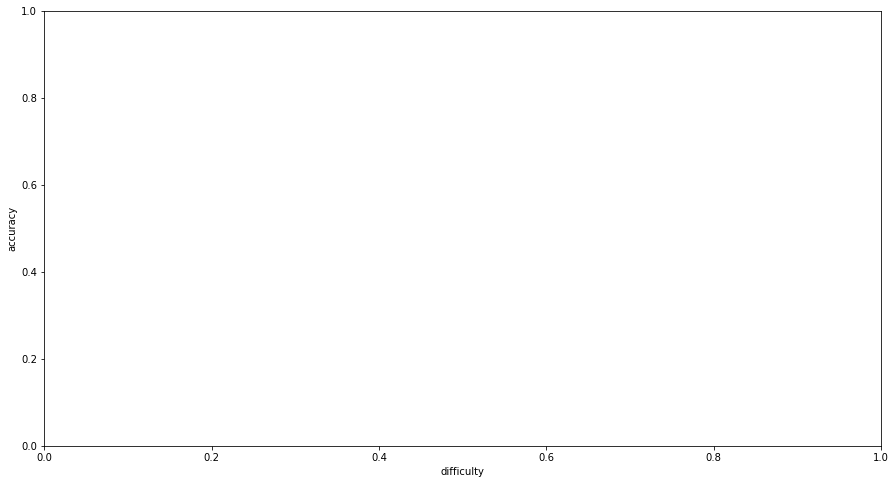

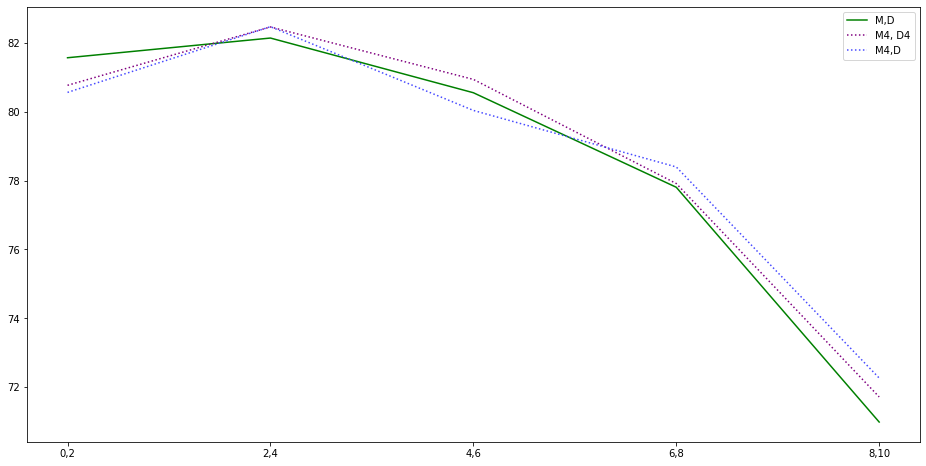

In [53]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls='-', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasyout*100, ls=':', color = 'purple')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasy_nor*100, ls=':', color = '#4649FF')


plt.legend(["M,D", "M4, D4", "M4,D"])
plt.show()

In [96]:
# print(myhistAccum)
# print(meanPerBin)
addition = 0
for ttt in range (12):
    addition += (myhistAccumCont[ttt] * meanPerBinCont[ttt])
print(addition/10000)

0.7735473649561405


In [104]:
# print(myhistAccum)
# print(meanPerBin)
addition = 0
for ttt in range (12):
    addition += (myhistAccumBal[ttt] * meanPerBinBal[ttt])
print(addition/10000)

0.7807967591792345


In [123]:
print(myhistAccumCont*meanPerBinCont)

[  15.4000001     9.8000001     6.33333337   17.06166664  239.32292824
 1313.43389761  781.8941541  1515.1754302  1691.76763027 1028.91033478
  678.10812228  432.61471226]


In [108]:
myhistAccumCont

array([  20.,    5.,   15.,   40.,  345., 1550.,  975., 1950., 2130.,
       1290., 1080.,  600.])

In [124]:
print(sum(myhistAccumCont))
print(sum(myhistAccum))

10000.0
10000.0


In [106]:
meanPerBinCont

array([0.77      , 0.81666667, 0.63333334, 0.58833333, 0.84268637,
       0.8365821 , 0.83091834, 0.79914316, 0.77108825, 0.73076018,
       0.68703964, 0.66658661])

In [109]:
myhistAccum

array([  35.,   25.,   28.,   48.,  550., 3101., 1931., 1435., 1201.,
        741.,  547.,  358.])

In [107]:
meanPerBin

array([0.72619048, 0.76095239, 0.58285715, 0.61619049, 0.83195212,
       0.82245232, 0.81758156, 0.78117882, 0.76437445, 0.71728251,
       0.69882983, 0.65006368])

In [215]:
df_cd_temp


,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a3064,a3065,a3066,a3067,a3068,a3069,a3070,a3071,Dffclt,class
0,26,17,13,13,13,14,14,15,14,10,...,144,33,29,46,28,27,26,27,-0.850018,8
1,94,101,95,94,94,97,111,142,166,154,...,147,150,152,163,174,182,184,155,2.216391,5
2,183,158,166,167,169,171,163,163,160,161,...,177,227,250,250,250,250,250,250,-0.684760,0
3,255,254,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,3.926303,6
4,182,156,156,144,118,132,148,118,136,85,...,83,75,79,72,68,73,67,75,1.266376,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54046,76,76,77,76,75,76,76,76,76,78,...,177,223,239,239,235,236,234,236,3.352000,8
54047,81,91,98,106,108,110,80,84,88,90,...,143,155,156,160,173,129,147,160,3.503452,3
54048,20,19,15,15,14,13,12,11,10,9,...,68,50,52,52,51,50,53,47,1.109084,5
54049,25,15,23,17,23,51,74,91,114,137,...,83,84,79,78,78,80,81,80,3.416564,1


In [3]:
newDiff = np.arange  (54051)
newDiff

array([    0,     1,     2, ..., 54048, 54049, 54050])

In [4]:
newDiff2 = newDiff*10/54050
newDiff2

array([0.00000000e+00, 1.85013876e-04, 3.70027752e-04, ...,
       9.99962997e+00, 9.99981499e+00, 1.00000000e+01])

In [5]:
df_with_newdiff = df_cd_temp.sort_values('Dffclt', ascending=True)
df_with_newdiff

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a3064,a3065,a3066,a3067,a3068,a3069,a3070,a3071,Dffclt,class
34419,252,251,251,251,250,249,250,247,238,218,...,251,250,250,251,251,251,251,251,-5.976701,9
16402,89,87,92,92,89,91,93,92,99,99,...,54,49,44,46,37,34,40,39,-5.976701,3
52436,108,105,144,146,136,124,126,116,134,186,...,102,97,118,132,126,138,155,123,-5.976701,2
4643,104,100,102,96,92,96,88,85,81,86,...,3,4,6,10,21,29,58,136,-5.964522,1
22660,184,165,178,172,164,185,189,178,183,189,...,188,188,185,184,186,186,168,171,-5.964522,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53487,146,179,156,177,178,107,85,79,67,71,...,137,129,123,130,113,120,128,105,5.997048,5
35470,198,249,255,255,255,255,255,255,255,255,...,52,56,63,57,56,63,70,65,5.997048,9
50266,157,151,149,147,145,145,140,137,133,134,...,48,52,58,69,66,73,78,77,5.997194,2
32249,129,163,167,142,125,89,88,104,104,109,...,125,126,123,132,132,132,127,116,5.997194,6


In [6]:
for myturn in range (54051):
    df_with_newdiff.iloc[myturn,3072] = newDiff2[myturn]

In [241]:
newDiff2[100]

0.018501387604070305

In [248]:
df_with_newdiff

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a3064,a3065,a3066,a3067,a3068,a3069,a3070,a3071,Dffclt,class
34419,252,251,251,251,250,249,250,247,238,218,...,251,250,250,251,251,251,251,251,0.000000,9
16402,89,87,92,92,89,91,93,92,99,99,...,54,49,44,46,37,34,40,39,0.000185,3
52436,108,105,144,146,136,124,126,116,134,186,...,102,97,118,132,126,138,155,123,0.000370,2
4643,104,100,102,96,92,96,88,85,81,86,...,3,4,6,10,21,29,58,136,0.000555,1
22660,184,165,178,172,164,185,189,178,183,189,...,188,188,185,184,186,186,168,171,0.000740,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53487,146,179,156,177,178,107,85,79,67,71,...,137,129,123,130,113,120,128,105,9.999260,5
35470,198,249,255,255,255,255,255,255,255,255,...,52,56,63,57,56,63,70,65,9.999445,9
50266,157,151,149,147,145,145,140,137,133,134,...,48,52,58,69,66,73,78,77,9.999630,2
32249,129,163,167,142,125,89,88,104,104,109,...,125,126,123,132,132,132,127,116,9.999815,6


In [7]:
df_with_newdiff = df_with_newdiff.sort_index()
df_with_newdiff

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a3064,a3065,a3066,a3067,a3068,a3069,a3070,a3071,Dffclt,class
0,26,17,13,13,13,14,14,15,14,10,...,144,33,29,46,28,27,26,27,1.105828,8
1,94,101,95,94,94,97,111,142,166,154,...,147,150,152,163,174,182,184,155,7.431267,5
2,183,158,166,167,169,171,163,163,160,161,...,177,227,250,250,250,250,250,250,1.594450,0
3,255,254,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,9.052174,6
4,182,156,156,144,118,132,148,118,136,85,...,83,75,79,72,68,73,67,75,6.050139,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54046,76,76,77,76,75,76,76,76,76,78,...,177,223,239,239,235,236,234,236,8.629417,8
54047,81,91,98,106,108,110,80,84,88,90,...,143,155,156,160,173,129,147,160,8.756522,3
54048,20,19,15,15,14,13,12,11,10,9,...,68,50,52,52,51,50,53,47,5.814986,5
54049,25,15,23,17,23,51,74,91,114,137,...,83,84,79,78,78,80,81,80,8.683996,1


In [253]:
# df_with_newdiff.to_csv('CIFAR_merged_newdiff.csv') 

In [56]:
import random
 
random.seed(3)
 
# print a random number between 1 and 1000.
print(random.randint(1, 1000))
 
# if you want to get the same random number again then,
random.seed(3)
print(random.randint(1, 1000))
 
# If seed function is not used
 
# Gives totally unpredictable responses.
print(random.randint(1, 1000))

244
244
607
